## **Linear regression for height and weight data**

Predicting the weight based on the height for the data given. <br>
DataSet link: https://raw.githubusercontent.com/rahulinchal/CSV-Files-/refs/heads/main/weight-height.csv

### Importing important package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rahulinchal/CSV-Files-/refs/heads/main/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Finding mathematical computation

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
float_df = df.select_dtypes(include = 'float')
float_df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [9]:
float_df.columns

Index(['Height', 'Weight'], dtype='object')

In [10]:
for i in float_df.columns:
    print(i,"\n", df[i].unique(), "\n")

Height 
 [73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588] 

Weight 
 [241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268] 



<Axes: xlabel='Weight'>

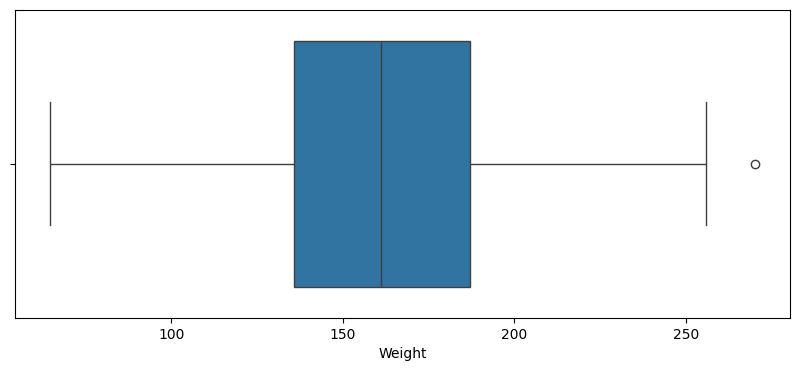

In [11]:
plt.figure(figsize = (10,4))
sns.boxplot(x = df['Weight'])

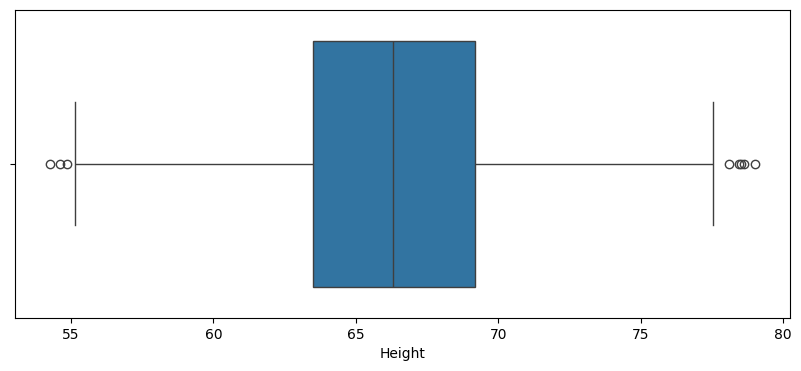

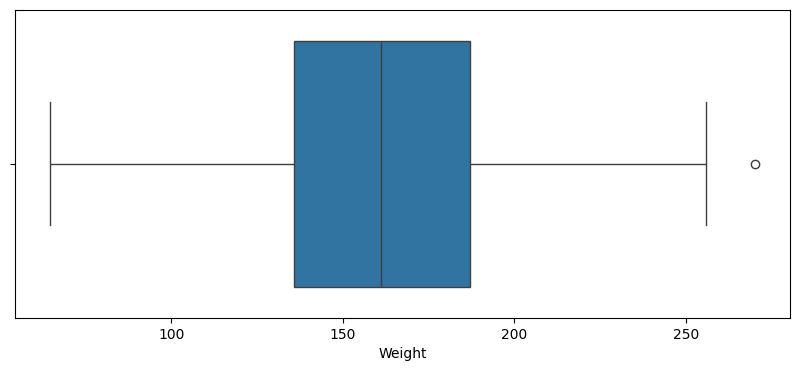

In [12]:
for i in float_df.columns:
    plt.figure(figsize = (10,4))
    sns.boxplot(x = df[i])
    plt.show()

In [13]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
df.groupby(['Gender'])['Height'].mean()

Gender
Female    63.708774
Male      69.026346
Name: Height, dtype: float64

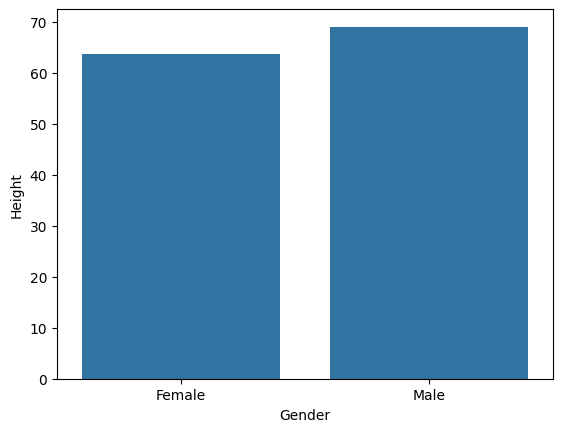

In [15]:
sns.barplot(x = df.groupby(['Gender'])['Height'].mean().keys(), y = df.groupby(['Gender'])['Height'].mean())
plt.show()

In [16]:
df.groupby(['Gender'])['Weight'].mean()

Gender
Female    135.860093
Male      187.020621
Name: Weight, dtype: float64

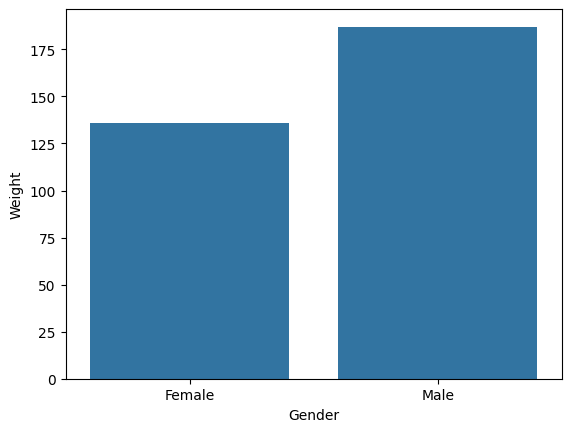

In [17]:
sns.barplot(x = df.groupby(['Gender'])['Weight'].mean().keys(), y = df.groupby(['Gender'])['Weight'].mean())
plt.show()

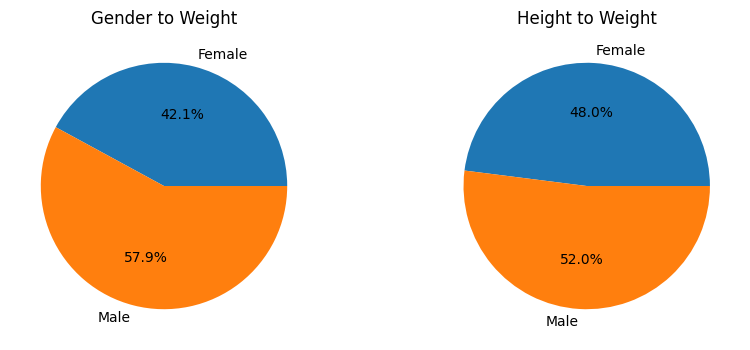

In [18]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.pie(df.groupby(['Gender'])['Weight'].mean(), labels = df.groupby(['Gender'])['Weight'].mean().keys(), autopct='%1.1f%%')
plt.title("Gender to Weight")

plt.subplot(1,2,2)
plt.pie(df.groupby(['Gender'])['Height'].mean(), labels = df.groupby(['Gender'])['Height'].mean().keys(), autopct='%1.1f%%')
plt.title("Height to Weight")
plt.show()

In [19]:
df = df[df['Height'] > 55]

In [20]:
df.shape

(9997, 3)

In [21]:
df = df[df['Weight'] < 250]

In [22]:
df = df[df['Height'] < 77]

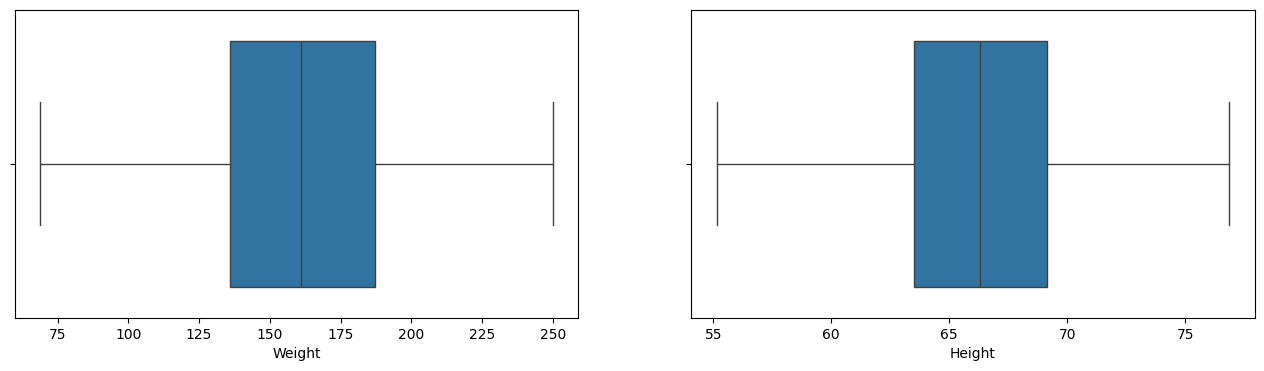

In [23]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.boxplot(x = df['Weight'])

plt.subplot(1,2,2)
sns.boxplot(x = df['Height'])
plt.show()

In [24]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### One hot encoding

In [25]:
df = pd.get_dummies(df, columns = ['Gender'])

In [26]:
df.head()

,Height,Weight,Gender_Female,Gender_Male
0,73.847017,241.893563,False,True
1,68.781904,162.310473,False,True
2,74.110105,212.740856,False,True
3,71.730978,220.042470,False,True
4,69.881796,206.349801,False,True


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9982 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Height         9982 non-null   float64
 1   Weight         9982 non-null   float64
 2   Gender_Female  9982 non-null   bool   
 3   Gender_Male    9982 non-null   bool   
dtypes: bool(2), float64(2)
memory usage: 253.4 KB


### Going for model building

In [28]:
x = df.drop(['Weight'], axis = 1).values
y = df['Weight'].values

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

### Scaling and fitting to the model

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Importing the linear regression model from sklearn

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(x_test)
y_pred

array([119.34495786, 194.70254386, 195.67129386, ..., 197.02285636,
       156.15745786, 144.36839536])

In [33]:
y_train

array([157.58443903, 133.23553844, 187.32163598, ..., 206.40178075,
       213.47257429, 142.68282509])

### Printing the accuracy 

In [34]:
print("Trainig Score: ",(lr.score(x_train, y_train))*100,"%")
print("Testing Score: ",(lr.score(x_test, y_test))*100,"%")

Trainig Score:  90.16854407955802 %
Testing Score:  90.2115422791874 %


### Plotting the actual and predicted values 

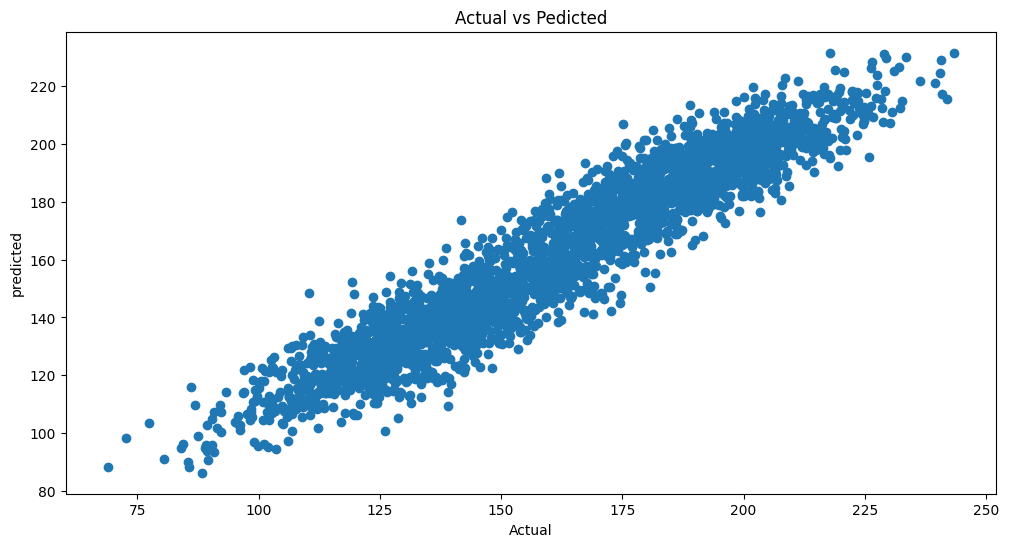

In [35]:
# Visualizing the actual and predicted values
plt.figure(figsize = (12,6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Pedicted')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

### Finding the difference between actual and predicted values

In [36]:
# Getting the difference between actial and predicted value
predicted_value = pd.DataFrame({'Actual Value': y_test.astype(int), 'Predicted Value': y_pred.astype(int), 'Difference': (y_test - y_pred).astype(int)})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
945,161,151,9
269,167,187,-19
1152,186,187,0
1837,196,197,-1
2686,130,137,-6
2047,134,134,0
274,201,187,14
61,226,228,-1
2027,115,119,-4
1926,171,179,-8


### Evaluating the error coefficient

In [37]:
# Importing Evaluation metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred)
print("R2 Linear regression :" ,r2*100)

MSE : 98.80289601269774
RMSE : 9.939964588100791
R2 Linear regression : 90.2115422791874
